 # 機械学習の体験

In [1]:
import unittest
import doctest

 ## きのこ派とたけのこ派に分類する


 ## pandas超入門


 ### pandasのインポート

 #### pandasをインポート

In [2]:
import pandas as pd
from pandas.testing import assert_frame_equal

 ### データフレームの作成

 #### ディクショナリをDataFrame関数でデータフレームに変換

In [3]:
data = {
    '松田の労働時間' : [160, 160], # 松田の労働時間列の作成
    '浅木の労働時間' : [161, 175], # 浅木の労働時間列の作成
}

df = pd.DataFrame(data)
df # DataFrameの表示

,松田の労働時間,浅木の労働時間
0,160,161
1,160,175


In [4]:
# DataFrameのアサーション
assert_frame_equal(df, pd.DataFrame({
    '松田の労働時間' : [160, 160],
    '浅木の労働時間' : [161, 175],
}))

 #### type関数でデータフレームのデータ型を確認

In [5]:
# セルの途中の場合、print関数を
# 利用しないと表示できない
print(type(df))
df.shape

<class 'pandas.core.frame.DataFrame'>


(2, 2)

 ### インデックスや列名の走査

 #### インデックスをデフォルトの整数から月に変更する

In [6]:
df.index = ['4月', '5月'] # インデックスの変更
df # DataFrameの表示

,松田の労働時間,浅木の労働時間
4月,160,161
5月,160,175


 #### 列名を変更する

In [7]:
df.columns = ['松田の労働(h)', '浅木の労働(h)'] # 列名の変更
df # DataFrameの表示

,松田の労働(h),浅木の労働(h)
4月,160,161
5月,160,175


 #### インデックスや列名のみを参照する

In [8]:
print(df.index) # インデックスの参照
print(df.columns) # 列名の参照

Index(['4月', '5月'], dtype='object')
Index(['松田の労働(h)', '浅木の労働(h)'], dtype='object')


 #### DataFrame関数の引数でインデックスや列名を指定する

In [9]:
df = [
    [160, 161],
    [160, 175]
]

df2 = pd.DataFrame(data, index= ['4月', '5月'], columns=['松田の労働', '浅木の労働'])

 ### CSVファイルの読み込み

 #### read_csv関数でCSVファイルからデータを読み込む

In [10]:
# pandasは別名pdでインポート済み
# KvsT.csvファイルを読み込んで、データフレームに変換
df = pd.read_csv('data/KvsT.csv')
# 先頭3行だけ表示
df.head(3)

,身長,体重,年代,派閥
0,170,60,10,きのこ
1,172,65,20,きのこ
2,170,60,30,たけのこ


 ### 特定の列の参照

 #### 指定した列だけを参照する

In [11]:
# 身長列だけを参照
df['身長']

0     170
1     172
2     170
3     170
4     177
5     168
6     169
7     170
8     180
9     170
10    165
11    170
12    175
13    170
14    170
15    155
16    160
17    170
18    175
Name: 身長, dtype: int64

 #### 複数の列を一度に参照する

In [12]:
# 抜き出したい列名の文字列リストを作成
col = ['身長', '体重']
# 身長と体重の列だけを参照
df[col]

,身長,体重
0,170,60
1,172,65
2,170,60
3,170,65
4,177,65
5,168,55
6,169,65
7,170,62
8,180,70
9,170,68


 #### 1列だけ抜き出したデータの型

In [13]:
type(df['派閥'])

pandas.core.series.Series

 #### 1次元のデータを扱うSeries型

In [14]:
df['派閥']

0      きのこ
1      きのこ
2     たけのこ
3      きのこ
4     たけのこ
5      きのこ
6     たけのこ
7     たけのこ
8     たけのこ
9      きのこ
10    たけのこ
11     きのこ
12    たけのこ
13    たけのこ
14    たけのこ
15     きのこ
16    たけのこ
17     きのこ
18    たけのこ
Name: 派閥, dtype: object

 ## データの前処理


 ### 特徴量と正解データ

 #### 特徴量を変数xに代入

In [15]:
# 特徴量の列を参照してxに代入
xcol = ['身長', '体重', '年代']
x = df[xcol]
x

,身長,体重,年代
0,170,60,10
1,172,65,20
2,170,60,30
3,170,65,40
4,177,65,10
5,168,55,20
6,169,65,30
7,170,62,40
8,180,70,10
9,170,68,20


 #### 正解データを変数tに代入

In [16]:
# 正解データ(派閥)を参照して, tに代入
t = df['派閥']
t

0      きのこ
1      きのこ
2     たけのこ
3      きのこ
4     たけのこ
5      きのこ
6     たけのこ
7     たけのこ
8     たけのこ
9      きのこ
10    たけのこ
11     きのこ
12    たけのこ
13    たけのこ
14    たけのこ
15     きのこ
16    たけのこ
17     きのこ
18    たけのこ
Name: 派閥, dtype: object

 ## モデルの準備と機械学習の実行


 ### scikit-learnのインポート

 #### treeモジュールのインポート

In [17]:
from sklearn import tree

 #### モデルの準備と学習

 ##### モデルの準備と学習の実行

In [18]:
# モデルの準備（未学習）
model = tree.DecisionTreeClassifier(random_state=0)

# 学習の実行（x,tは事前に定義済みの特徴料と正解ラベル）
model.fit(x, t)

DecisionTreeClassifier(random_state=0)

 #### 新しいデータでの予測

 ##### きのこかたけのこか予測する

In [19]:
# 身長170cm,体重70kg,年齢20代のデータ（新しいデータ)を
# 2次元リストで作成
taro = [[170, 70, 20]]

# taroがどちらに分類されるか予測
model.predict(taro)

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['きのこ'], dtype=object)

 ##### 複数の予測を一度に実行

In [20]:
matsuda = [172, 65, 20] # 松田のデータ
asagi = [158, 48, 20]     # 浅木のデータ
new_data = [matsuda, asagi] # 2人のデータを二次元リスト化

model.predict(new_data) # 2人のデータを一括で予測

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['きのこ', 'たけのこ'], dtype=object)

 ## モデルの評価


 ### 予測性能の評価

 #### 正解率
 $正解率 = \frac{実際の答えと予測結果が一致している件数}{全データ件数}$

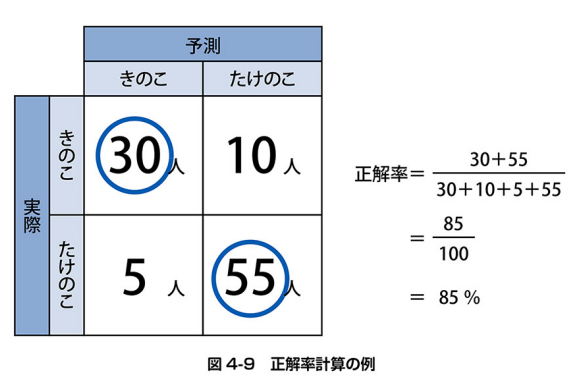

In [21]:
from PIL import Image
im = Image.open('img/4-9.png')
im

 #### 正解率の計算

In [22]:
# 正解率の計算
model.score(x, t)

1.0

 ## モデルの保存


 ### pickleによるモデルの保存

 #### モデルの保存

In [23]:
import pickle

with open('model/kvst-model.pkl', 'wb') as f:
    pickle.dump(model, f)

 #### KinokoTakenoko.pklからモデルを変数に読み込む

In [24]:
import pickle

with open('model/kvst-model.pkl', 'rb') as f:
    model = pickle.load(f)

 #### ファイルから読み込んだ学習済モデルで予測する

In [25]:
suzuki = [[180, 80, 30]]
model.predict(suzuki)

c:\Users\kakim\Projects\github\k2works\programing_introduce_2023\.venv\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['たけのこ'], dtype=object)

 #### データの準備・前処理からモデルの評価までの全体像

In [26]:
import pandas as pd

# データの読み込み
df = pd.read_csv('data/KvsT.csv')

# 特徴量と正解データに分割
xcol = ['身長', '体重', '年代']
x = df[xcol]
t = df['派閥']

# モデルの準備と学習
from sklearn import tree
model = tree.DecisionTreeClassifier(random_state=0)
model.fit(x, t)

# 正解率の計算
model.score(x, t)

1.0